In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#importing the dataset

In [ ]:
mall_data=pd.read_csv("/content/drive/MyDrive/machine/Mall_Customers.csv")
mall_data.head(20)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


#To check there is no missing values

In [ ]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#taking the Annual Income and spending score and put it 2D-array

In [ ]:
X = mall_data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#K-means will apply it for the segmentation
#Perform Elbow Method To Find Optimal Number Of Clusters
the importance of this method is to know the number of clusters to catogrize the data based on (N) clusters

In [ ]:
wcss=[] #within cluster sum of squares
for i in range (1,11): #we will do in a range of 10 clusters
  kmeans= KMeans(n_clusters= i, init='k-means++',random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

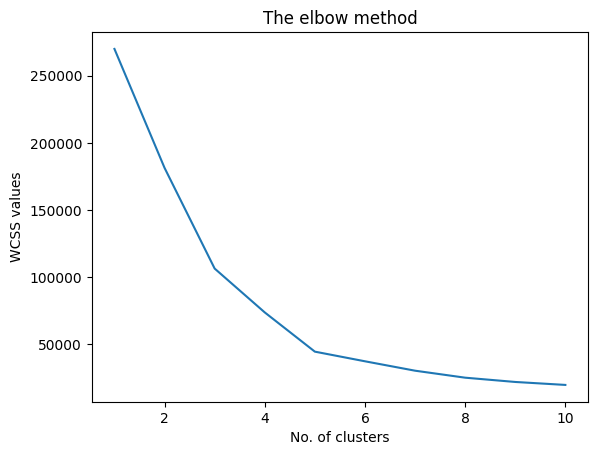

In [ ]:
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS values")
plt.show()

#after the plotting we know there will be 5 clusters or 5 categories

In [ ]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++',random_state = 0)

In [ ]:
y_Kmeans = kmeansmodel.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#the benfit of this plot will be 5 types of people know how much there are  anual incomes and how much there a spending and put them together

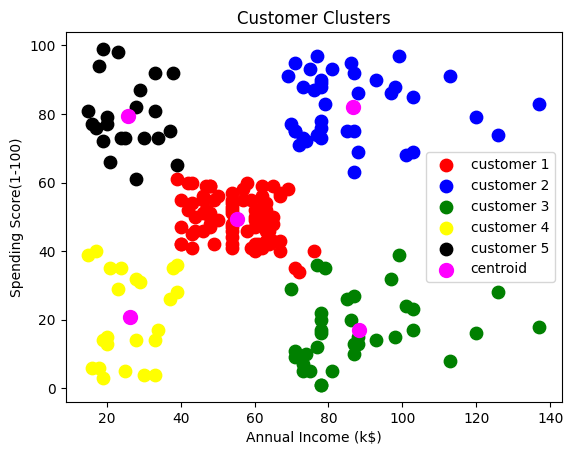

In [ ]:
plt.scatter(X[y_Kmeans == 0,0],X[y_Kmeans == 0,1], s= 80, c="red", label ="customer 1")
plt.scatter(X[y_Kmeans == 1,0],X[y_Kmeans == 1,1], s= 80, c="blue", label ="customer 2")
plt.scatter(X[y_Kmeans == 2,0],X[y_Kmeans == 2,1], s= 80, c="green", label ="customer 3")
plt.scatter(X[y_Kmeans == 3,0],X[y_Kmeans == 3,1], s= 80, c="yellow", label ="customer 4")
plt.scatter(X[y_Kmeans == 4,0],X[y_Kmeans == 4,1], s= 80, c="black", label ="customer 5")
plt.scatter(kmeansmodel.cluster_centers_[:,0],kmeansmodel.cluster_centers_[:,1], s=100, c="magenta", label="centroid")
plt.title("Customer Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()





In [ ]:
What type of machine learning problem is this?
K-means clustering


In [ ]:
What machine learning algorithms are suitable for customer
segmentation tasks?

Unsupervised Learning Algorithms
K-Means Clustering:

Hierarchical Clustering:

DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

Gaussian Mixture Models (GMM):
